# Performance Evaluation Methods

## Performance evaluation for classification algorithms

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model


#Reading in the fraud detection dataset

df = pd.read_csv("fraud_prediction.csv")


#Creating the features

features = df.drop("isFraud",axis = 1).values


target = df["isFraud"].values


#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3,random_state=42,stratify=target)


#Building the K-NN Classifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train,y_train)

#Initializing an logistic regression object


logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets


logistic_regression.fit(X_train, y_train)

LogisticRegression()

### The confusion matrix

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans


from sklearn.metrics import confusion_matrix

#Creating predictions on the test set 

prediction = knn_classifier.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[6026   14]
 [  32 2432]]


In [4]:
#Creating the classification report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6040
         1.0       0.99      0.99      0.99      2464

    accuracy                           0.99      8504
   macro avg       0.99      0.99      0.99      8504
weighted avg       0.99      0.99      0.99      8504



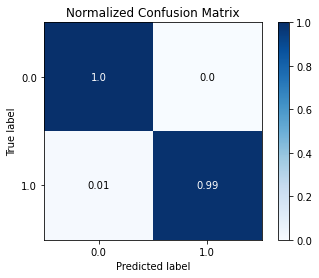

In [5]:
#Normalized confusion matrix for the k-NN model

prediction_labels = knn_classifier.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize = True)
plt.show()

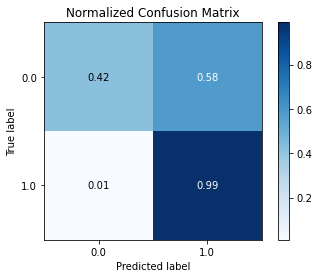

In [6]:
# Normalized confusion matrix for the logistic regression model


prediction_labels = logistic_regression.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize=True)
plt.show()

## Area under the curve

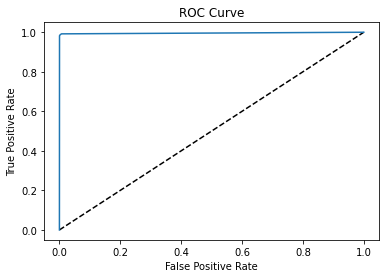

In [7]:
#Probablilties for each prediction output


target_prob = knn_classifier.predict_proba(X_test)[:,1]

#Plotting the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, target_prob)

plt.plot([0,1],[0,1],"k--")

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.show()

In [8]:
# Computing the auc score

roc_auc_score(y_test,target_prob)

0.9957227788767524

## Cumulative gains curve

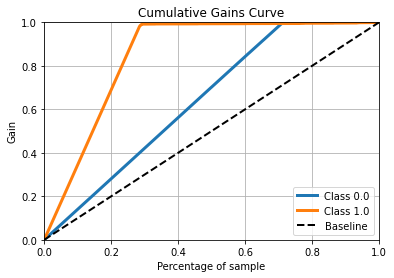

In [9]:
target_prob = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,target_prob)
plt.show()

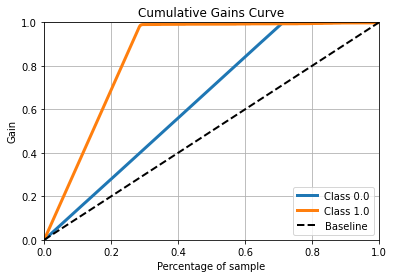

In [10]:
#Cumulative gains plot for the logistic regression model

target_prob = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,target_prob)
plt.show()

## Lift curve

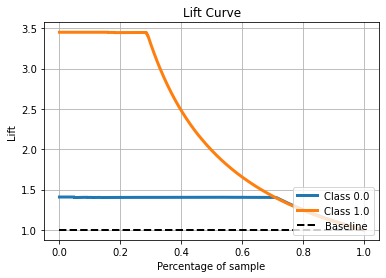

In [11]:
#Lift curve for the k-NN model

target_prob = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,target_prob)
plt.show()

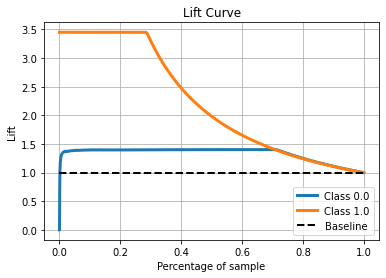

In [12]:
#Cumulative gains plot for the logistic regression model

target_prob = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,target_prob)
plt.show()

## K-S statistic plot

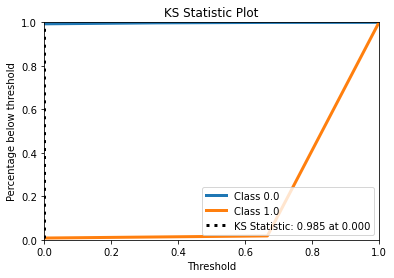

In [13]:
#KS plot for the k-NN model

target_proba = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,target_proba)
plt.show()

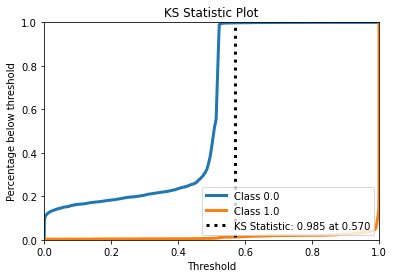

In [14]:
#KS plot for the logistic regression model


target_proba = logistic_regression.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,target_proba)
plt.show()

## Calibration plot

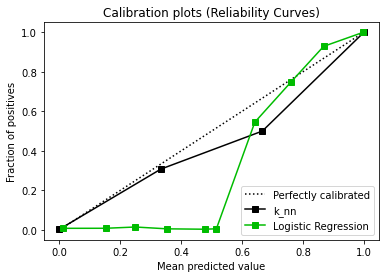

In [17]:
#Extracting the probablities that the positve class will be predicted

knn_proba = knn_classifier.predict_proba(X_test)
log_proba = logistic_regression.predict_proba(X_test)


#Storing prbablities in a list 


probas = [knn_proba,log_proba]

#Storing the model names in a list 



model_names = ["k_nn","Logistic Regression"]

#Creating the calibration plot

skplt.metrics.plot_calibration_curve(y_test,probas,model_names)

plt.show()